In [13]:

# 1️⃣ Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
# 2️⃣ Load dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (178, 14)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  prol

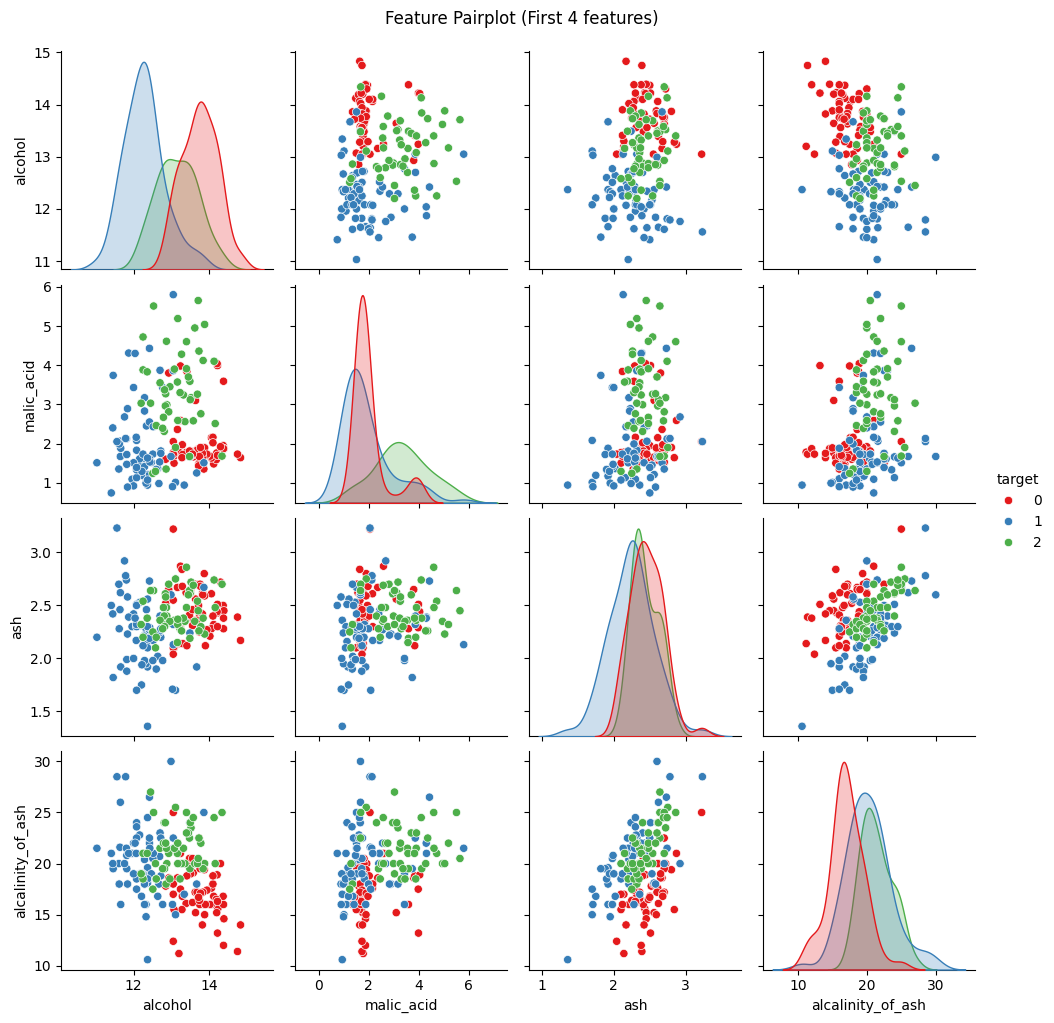

<Figure size 640x480 with 0 Axes>

In [15]:
# 3️⃣ Exploratory analysis
sns.pairplot(df, vars=wine.feature_names[:4], hue='target', palette='Set1')
plt.suptitle("Feature Pairplot (First 4 features)", y=1.02)
plt.show()
plt.savefig("pairplot.png")


In [16]:
# 4️⃣ Train-test split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
# 5️⃣ Train Random Forest model
rf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=5, 
    random_state=42
)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
# 6️⃣ Evaluate
y_pred = rf.predict(X_test)
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



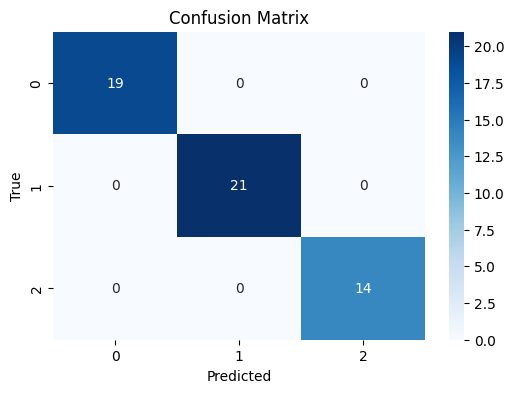

<Figure size 640x480 with 0 Axes>

In [19]:
# 7️⃣ Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
plt.savefig("confusion_matrix.png")

In [20]:

# 8️⃣ Feature importance
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)


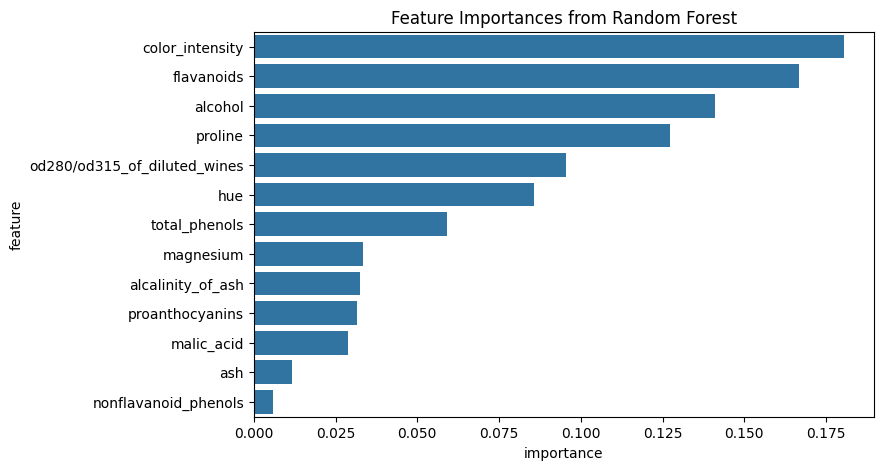

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x='importance', y='feature', data=importances)
plt.title("Feature Importances from Random Forest")
plt.show()
plt.savefig("feature_importances.png")